# Detecting Corrosion Using YOLOv5: A Comprehensive Workflow
**Introduction:**
In industrial environments, corrosion detection is critical for maintaining the integrity of structures and equipment. This notebook demonstrates how to set up and train a YOLOv5 model to detect corrosion in images. We will cover every step from setting up the environment to deploying the model and testing it on real-world data.

![picture](https://i.pinimg.com/736x/2e/78/dd/2e78dd7707a9e8e71e7f5e053807cdc0.jpg)

**Step 2: Clone the YOLOv5 Repository**

**Explanation:** Next, we clone the YOLOv5 repository from GitHub. YOLOv5 is a state-of-the-art object detection model, and this step brings the necessary codebase into your environment.

**Technical Insight:** Cloning the repository gives you access to all the scripts and configurations required to train and deploy the YOLOv5 model, setting the stage for further customization.

![picture](https://i.pinimg.com/736x/bd/b2/4d/bdb24d0e3342d9d26539acb0ed8fb81e.jpg)

In [ ]:


# Clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5

# Install required dependencies
!pip install -r requirements.txt


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Cloning into 'yolov5'...
remote: Enumerating objects: 16927, done.
remote: Counting objects: 100% (122/122), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 16927 (delta 62), reused 86 (delta 47), pack-reused 16805 (from 1)
Receiving objects: 100% (16927/16927), 15.69 MiB | 26.08 MiB/s, done.
Resolving deltas: 100% (11595/11595), done.
/content/yolov5/yolov5/yolov5


**Step 3: Update and Verify the Data Configuration**

**Explanation:** We update the data.yaml file to include the paths to our training and validation datasets. This file is crucial as it tells YOLOv5 where to find the data and what labels are being used.

**Business Context:** Accurate configuration of data paths ensures that the model is trained on the correct datasets, which is essential for effective learning and accurate predictions.

![picture](https://i.pinimg.com/736x/37/7d/06/377d068ed4a0a803767e887ca49bb8b8.jpg)

In [ ]:
# Update the data.yaml file with absolute paths
data_yaml = """
train: /01 Data/train/images
val: /01 Data/validate/images

nc: 1  # Number of classes
names: ['Grado3']  # Class names
"""


# Write the updated data.yaml file
with open('/data.yaml', 'w') as f:
    f.write(data_yaml)

# Verify the contents of the updated data.yaml file
!cat /content/drive/MyDrive/corrosion_dataset/data.yaml



train: /content/drive/MyDrive/corrosion_dataset/train/images
val: /content/drive/MyDrive/corrosion_dataset/validate/images

nc: 1  # Number of classes
names: ['Grado3']  # Class names


In [ ]:
# Display the contents of the updated data.yaml file
!cat /data.yaml



train: /content/drive/MyDrive/corrosion_dataset/train/images
val: /content/drive/MyDrive/corrosion_dataset/validate/images

nc: 1  # Number of classes
names: ['Grado3']  # Class names


# Step 4: Train the YOLOv5 Model

**Explanation:** Now, we train the YOLOv5 model using the specified dataset and configurations. The training process involves iteratively improving the model's ability to detect corrosion by learning from the provided images.

**Technical Insight:** Training a model involves adjusting its internal parameters based on the input data and feedback from previous predictions, aiming to minimize errors and improve accuracy.

![picture](https://i.pinimg.com/736x/1e/82/33/1e8233c28b9d15fed5973bdc296e5c14.jpg)

In [ ]:
# Train the model with the updated data.yaml file
!python train.py --img 640 --batch 16 --epochs 50 --data /01 Data/data.yaml --weights yolov5s.pt --cache


2024-09-01 13:43:28.250106: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-01 13:43:28.270401: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-01 13:43:28.276439: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=/content/drive/MyDrive/corrosion_dataset/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, mu

# Step 5: Test the Trained Model

**Explanation:** After training, we test the YOLOv5 model on a separate test dataset to evaluate its performance. This step is crucial for understanding how well the model generalizes to new, unseen data.

**Business Impact:** Testing ensures that the model performs well in real-world scenarios, enabling its deployment in practical applications for corrosion detection.

In [ ]:
# Test the model on the test dataset
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.25 --source /01 Data/test/images --save-txt --save-conf


detect: weights=['runs/train/exp/weights/best.pt'], source=/content/drive/MyDrive/corrosion_dataset/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-362-ge8a30cf8 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/19 /content/drive/MyDrive/corrosion_dataset/test/images/G3--14-_jpg.rf.c4f0618688b0ba54ff8ec6c302b13dc0.jpg: 640x640 (no detections), 11.5ms
WARNING ⚠️ NMS time limit 0.550s exceeded
image 2/19 /content/drive/MyDrive/corrosion_dataset/test/images/G3--141-_jpg.rf.93022e42a796

# Step 6: Visualize Detection Results

**Explanation:** This step involves visualizing the results of the model's detections. By displaying the images with the detected corrosion highlighted, we can visually assess the model's accuracy and effectiveness.

**Technical Insight:** Visualization is an essential step in model validation, as it provides immediate feedback on the model’s performance and helps in identifying any areas for improvement.

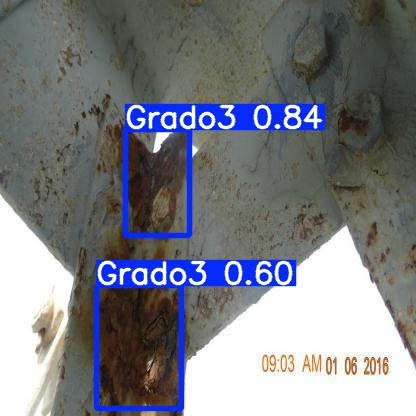

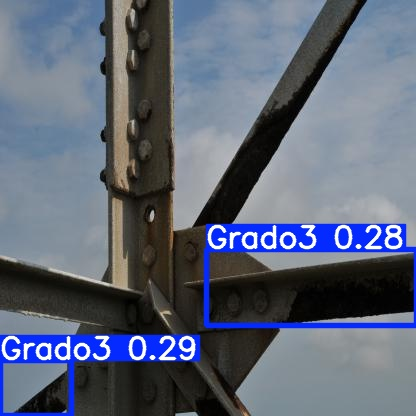

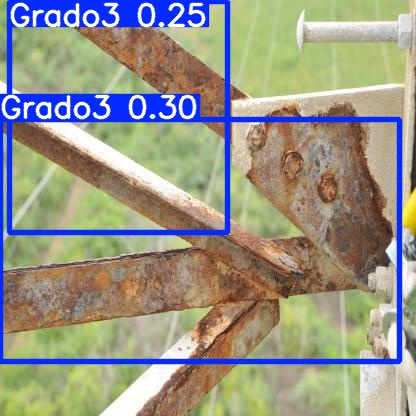

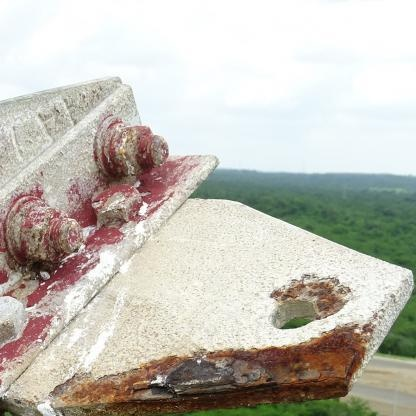

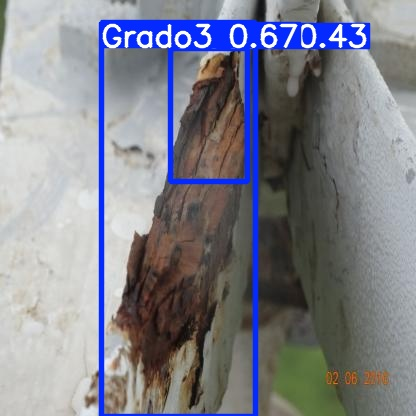

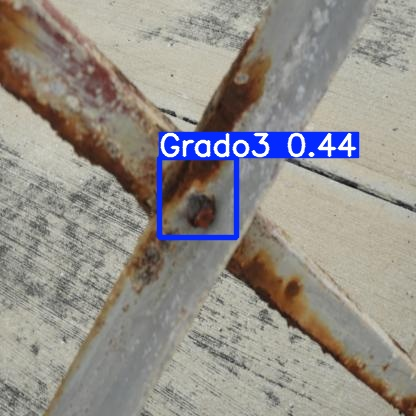

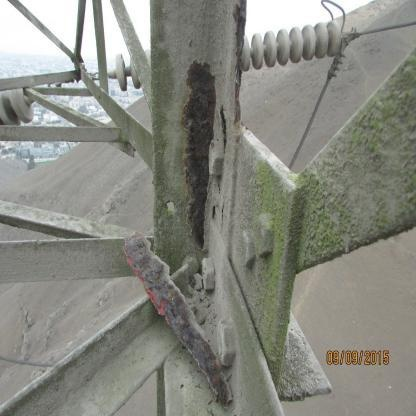

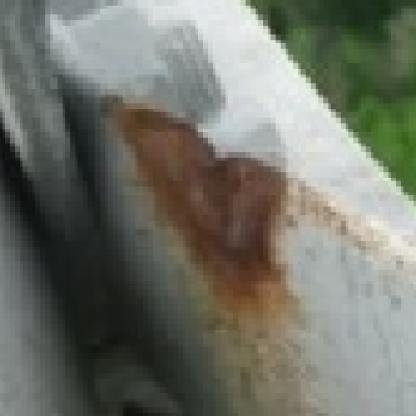

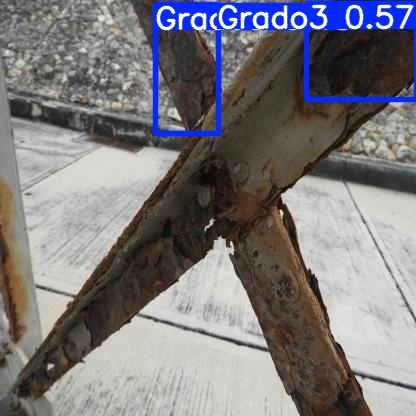

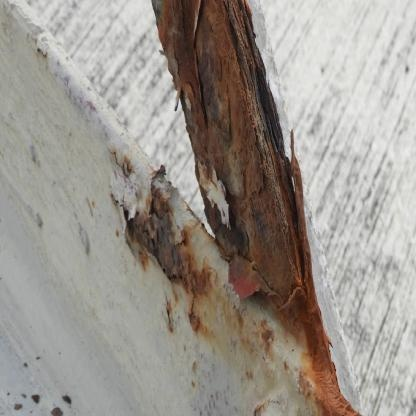

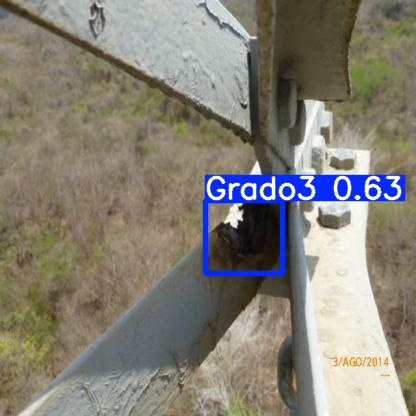

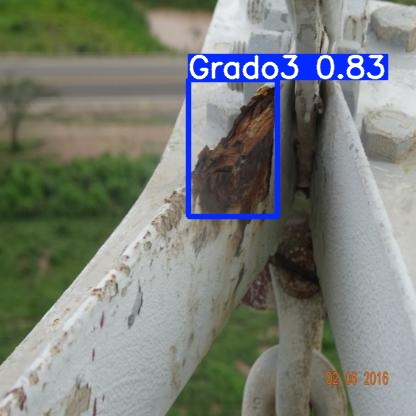

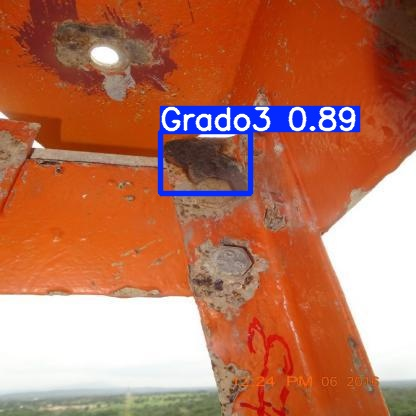

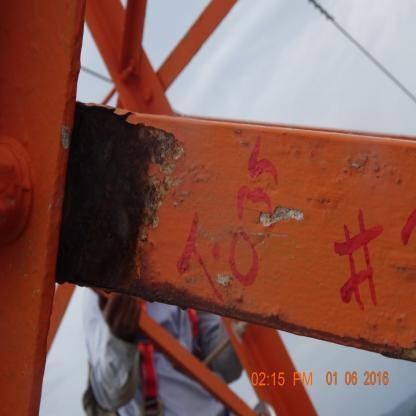

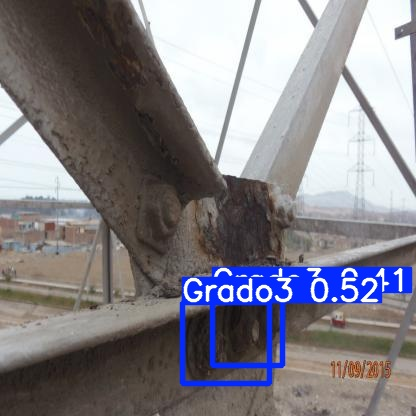

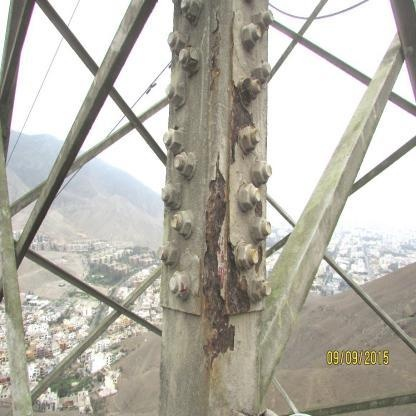

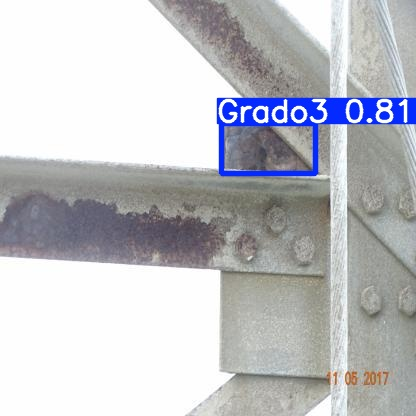

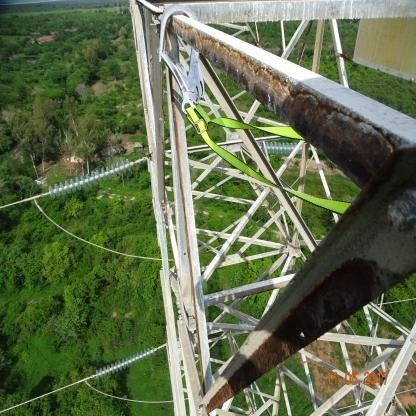

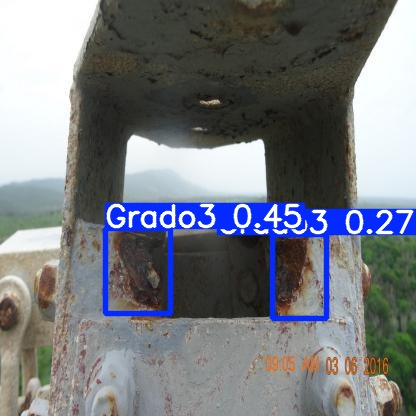

In [ ]:
import glob
from IPython.display import Image, display

# Display images with detection results
result_images = glob.glob('runs/detect/exp/*.jpg')

for image in result_images:
    display(Image(filename=image))


# Step 7: Save the Trained Model

**Explanation:** We save the best-trained model to Google Drive, ensuring that it is preserved for future use or deployment. This step is crucial for safeguarding the trained model and making it accessible for further analysis or application.

**Business Context:** Saving the trained model allows for continuous improvement and deployment in various operational environments, providing long-term value from the training process.

![picture](https://i.pinimg.com/736x/42/a2/ea/42a2ead5efdac84c9758872e3901d4ae.jpg)

In [ ]:
# Save the trained model to Google Drive
!cp runs/train/exp/weights/best.pt /02 Notebook/corrosion_detection_model.pt


# Step 8: Upload and Test on Custom Images

**Explanation:** In this final step, we upload a custom image and run the YOLOv5 model to detect corrosion. This demonstrates the model’s ability to generalize and perform on any given image, making it a versatile tool for real-world applications.

**Technical Insight:** Testing on custom images allows you to see the model’s performance on specific scenarios, ensuring that it meets the needs of your particular use case.


Saving corr.jpeg to corr.jpeg
User uploaded file "corr.jpeg" with length 11305 bytes


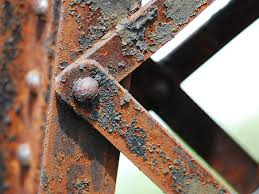

detect: weights=['/content/drive/MyDrive/corrosion_detection_model.pt'], source=corr.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=corrosion_detection, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-362-ge8a30cf8 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/yolov5/yolov5/yolov5/corr.jpeg: 480x640 1 Grado3, 28.2ms
Speed: 0.6ms pre-process, 28.2ms inference, 525.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/corrosion_detection
1 labels saved to runs/detect/corrosion_detection/labels


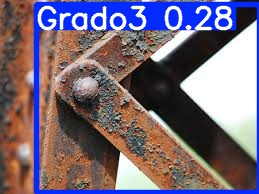

In [ ]:
from google.colab import files
from IPython.display import Image, display

# 1. Upload an image from your computer
uploaded = files.upload()

# Display the uploaded image
for filename in uploaded.keys():
    print(f'User uploaded file "{filename}" with length {len(uploaded[filename])} bytes')
    display(Image(filename=filename))
    image_path = filename

# 2. Run YOLOv5 detection on the uploaded image
!python detect.py --weights /02 Notebook/corrosion_detection_model.pt --img 640 --conf 0.25 --source {image_path} --save-txt --save-conf --name corrosion_detection

# 3. Display the detection result
result_image_path = f'runs/detect/corrosion_detection/{image_path}'
display(Image(filename=result_image_path))
